In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [3]:
df = pd.read_csv('/content/data.csv', header= 0, encoding= 'unicode_escape')

In [4]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# Data Cleaning

## Data format cleaning

In [5]:
df.rename(columns={"InvoiceNo":"invoice_num", 
                   "StockCode":"stock_code", 
                  "Description":"description", 
                  "Quantity":"quantity", 
                  "InvoiceDate":"invoice_date", 
                  "UnitPrice":"unit_price", 
                  "CustomerID":"customer_id", 
                  "Country":"country"}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100247 entries, 0 to 100246
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   100247 non-null  object 
 1   stock_code    100247 non-null  object 
 2   description   99948 non-null   object 
 3   quantity      100247 non-null  int64  
 4   invoice_date  100247 non-null  object 
 5   unit_price    100246 non-null  float64
 6   customer_id   65312 non-null   float64
 7   country       100246 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


The column related to the transaction date will be converted from 'object' (a simple string basically) to the very convenient date format "date-time" in pandas.

In [7]:
df['invoice_date']=pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

Moreover, the description column will be converter into lower case.

In [8]:
df['description']=df.description.str.lower()

In [9]:
df.head()

invoice_num stock_code                          description  quantity  \
0      536365     85123A   white hanging heart t-light holder         6   
1      536365      71053                  white metal lantern         6   
2      536365     84406B       cream cupid hearts coat hanger         8   
3      536365     84029G  knitted union flag hot water bottle         6   
4      536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id         country  
0 2010-12-01 08:26:00        2.55      17850.0  United Kingdom  
1 2010-12-01 08:26:00        3.39      17850.0  United Kingdom  
2 2010-12-01 08:26:00        2.75      17850.0  United Kingdom  
3 2010-12-01 08:26:00        3.39      17850.0  United Kingdom  
4 2010-12-01 08:26:00        3.39      17850.0  United Kingdom

## Missing data analysis and handling

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100247 entries, 0 to 100246
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   100247 non-null  object        
 1   stock_code    100247 non-null  object        
 2   description   99948 non-null   object        
 3   quantity      100247 non-null  int64         
 4   invoice_date  100247 non-null  datetime64[ns]
 5   unit_price    100246 non-null  float64       
 6   customer_id   65312 non-null   float64       
 7   country       100246 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.1+ MB


There are some null values for description and customer id.<br>
In particular the exact number of missing values in each column is:

In [11]:
df.isnull().sum().sort_values(ascending=False)

customer_id     34935
description       299
unit_price          1
country             1
invoice_num         0
stock_code          0
quantity            0
invoice_date        0
dtype: int64

The portion of dataframe where some values are missing is the following:

In [12]:
df_miss=df[df.isnull().any(axis=1)]
df_miss.head()

invoice_num stock_code                      description  quantity  \
622       536414      22139                              NaN        56   
1443      536544      21773  decorative rose bathroom bottle         1   
1444      536544      21774  decorative cats bathroom bottle         2   
1445      536544      21786               polkadot rain hat          4   
1446      536544      21787            rain poncho retrospot         2   

            invoice_date  unit_price  customer_id         country  
622  2010-12-01 11:52:00        0.00          NaN  United Kingdom  
1443 2010-12-01 14:32:00        2.51          NaN  United Kingdom  
1444 2010-12-01 14:32:00        2.51          NaN  United Kingdom  
1445 2010-12-01 14:32:00        0.85          NaN  United Kingdom  
1446 2010-12-01 14:32:00        1.66          NaN  United Kingdom

## Is there any relationship between the missing data?

In [13]:
df_miss.head()

invoice_num stock_code                      description  quantity  \
622       536414      22139                              NaN        56   
1443      536544      21773  decorative rose bathroom bottle         1   
1444      536544      21774  decorative cats bathroom bottle         2   
1445      536544      21786               polkadot rain hat          4   
1446      536544      21787            rain poncho retrospot         2   

            invoice_date  unit_price  customer_id         country  
622  2010-12-01 11:52:00        0.00          NaN  United Kingdom  
1443 2010-12-01 14:32:00        2.51          NaN  United Kingdom  
1444 2010-12-01 14:32:00        2.51          NaN  United Kingdom  
1445 2010-12-01 14:32:00        0.85          NaN  United Kingdom  
1446 2010-12-01 14:32:00        1.66          NaN  United Kingdom

In [14]:
df_miss["day"] = df_miss['invoice_date'].map(lambda x: x.day)
df_miss["month"] = df_miss['invoice_date'].map(lambda x: x.month)
df_miss["year"] = df_miss['invoice_date'].map(lambda x: x.year)

In [15]:
df_miss['daymonth']=df_miss['day'].astype(str)+'/'+df_miss['month'].astype(str)
df_miss['daymonthyear']=df_miss['daymonth'].astype(str)+'/'+df_miss['year'].astype(str)
df_miss['monthyear']=df_miss['month'].astype(str)+'/'+df_miss['year'].astype(str)

In [16]:
df_miss.head()

invoice_num stock_code                      description  quantity  \
622       536414      22139                              NaN        56   
1443      536544      21773  decorative rose bathroom bottle         1   
1444      536544      21774  decorative cats bathroom bottle         2   
1445      536544      21786               polkadot rain hat          4   
1446      536544      21787            rain poncho retrospot         2   

            invoice_date  unit_price  customer_id         country  day  month  \
622  2010-12-01 11:52:00        0.00          NaN  United Kingdom    1     12   
1443 2010-12-01 14:32:00        2.51          NaN  United Kingdom    1     12   
1444 2010-12-01 14:32:00        2.51          NaN  United Kingdom    1     12   
1445 2010-12-01 14:32:00        0.85          NaN  United Kingdom    1     12   
1446 2010-12-01 14:32:00        1.66          NaN  United Kingdom    1     12   

      year daymonth daymonthyear monthyear  
622   2010     1/12    1/12/2010   12/2010  
1443  2010     1/12    1/12/2010   12/2010  
1444  2010     1/12    1/12/2010   12/2010  
1445  2010     1/12    1/12/2010   12/2010  
1446  2010     1/12    1/12/2010   12/2010

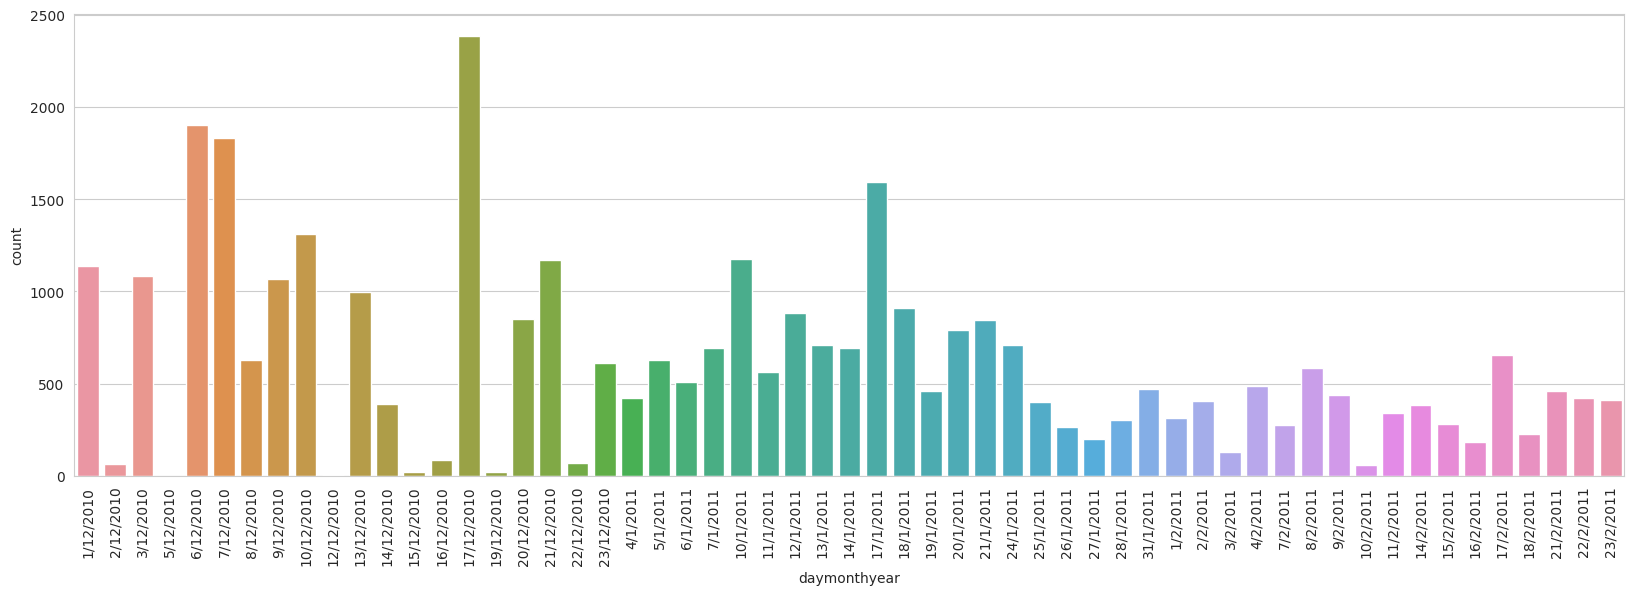

In [17]:
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.countplot(x='daymonthyear', data=df_miss)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

This plot looks messy, but its clear that during some days there have been more missing values than others.<br>
In particular the days with most missing values are:

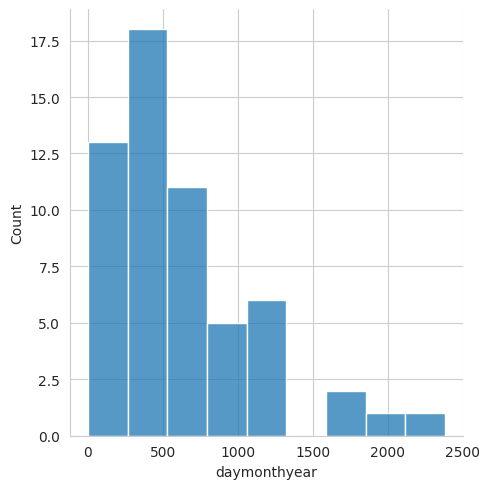

In [18]:
sns.displot(df_miss['daymonthyear'].value_counts())

We can see that during some days, more than 2500 customers_id are missing. We will now check the days where most cusomers id are missing.

In [19]:
df_miss['daymonthyear'].value_counts()[:20]

17/12/2010    2384
6/12/2010     1904
7/12/2010     1830
17/1/2011     1591
10/12/2010    1309
10/1/2011     1177
21/12/2010    1168
1/12/2010     1140
3/12/2010     1085
9/12/2010     1069
13/12/2010     999
18/1/2011      910
12/1/2011      884
20/12/2010     850
21/1/2011      846
20/1/2011      792
24/1/2011      712
13/1/2011      708
7/1/2011       693
14/1/2011      693
Name: daymonthyear, dtype: int64

It could be interesting to check if during these days something happend and caused the missing values.

For further analysis, the rows with missing values will be dropped and a new df called 'df_new' will be defined

In [20]:
df_new=df.dropna()

In [21]:
#check if there a are missing values in the new dataframe
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65312 entries, 0 to 100226
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_num   65312 non-null  object        
 1   stock_code    65312 non-null  object        
 2   description   65312 non-null  object        
 3   quantity      65312 non-null  int64         
 4   invoice_date  65312 non-null  datetime64[ns]
 5   unit_price    65312 non-null  float64       
 6   customer_id   65312 non-null  float64       
 7   country       65312 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.5+ MB


Now the dataframe does not have any missing values

## Duplicated Values handling

In [23]:
df_new[df_new.duplicated()].head()

invoice_num stock_code                        description  quantity  \
517      536409      21866        union jack flag luggage tag         1   
527      536409      22866      hand warmer scotty dog design         1   
537      536409      22900    set 2 tea towels i love london          1   
539      536409      22111       scottie dog hot water bottle         1   
555      536412      22327  round snack boxes set of 4 skulls         1   

           invoice_date  unit_price  customer_id         country  
517 2010-12-01 11:45:00        1.25      17908.0  United Kingdom  
527 2010-12-01 11:45:00        2.10      17908.0  United Kingdom  
537 2010-12-01 11:45:00        2.95      17908.0  United Kingdom  
539 2010-12-01 11:45:00        4.95      17908.0  United Kingdom  
555 2010-12-01 11:49:00        2.95      17920.0  United Kingdom

In [24]:
df_new.duplicated().sum()

912

There are 5225 duplicated transactions<br>
These transaction will be dropped from the dataset.

In [25]:
df_new.drop_duplicates(inplace=True)

In [26]:
df_new.duplicated().sum()

0

## Change columns type

Next, the 'customer_id' column will be converted to 'int' from 'float' since customersID are integer numbers.

In [27]:
df_new['customer_id']=df_new.customer_id.astype('int64')

In [28]:
df_new.describe()

quantity    unit_price   customer_id
count  64400.000000  64400.000000  64400.000000
mean      12.287314      3.288317  15343.295186
std      418.266314     10.678362   1770.055022
min   -74215.000000      0.000000  12346.000000
25%        2.000000      1.250000  13862.000000
50%        5.000000      1.950000  15311.000000
75%       12.000000      3.750000  16980.000000
max    74215.000000   1715.850000  18283.000000

Quantity has negative values and unit price has a minimum value of 0

In [29]:
np.sum(df_new['quantity'] < 0)

1757

There are 8872 transactions with negative quantity. We will investigate if they are related to canceled orders or mistakes.

### Canceled orders analysis

In [30]:
canceled_orders = df_new[df_new['invoice_num'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

invoice_num stock_code                       description  quantity  \
141     C536379          D                          discount        -1   
154     C536383     35004C   set of 3 coloured  flying ducks        -1   
235     C536391      22556    plasters in tin circus parade        -12   
236     C536391      21984  pack of 12 pink paisley tissues        -24   
237     C536391      21983  pack of 12 blue paisley tissues        -24   

           invoice_date  unit_price  customer_id         country  
141 2010-12-01 09:41:00       27.50        14527  United Kingdom  
154 2010-12-01 09:49:00        4.65        15311  United Kingdom  
235 2010-12-01 10:24:00        1.65        17548  United Kingdom  
236 2010-12-01 10:24:00        0.29        17548  United Kingdom  
237 2010-12-01 10:24:00        0.29        17548  United Kingdom

By analyzing the first 5 values of the dataframe we can see that the quantity has a negative values, is this true for all canceled orders?

In [31]:
(canceled_orders['quantity'] < 0).sum()

1757

Yes, as expetcted all the transactions with negative values are canceled orders.

In [32]:
print('The percentage of canceled orders is: {} %'.format(round(canceled_orders.shape[0]/df_new.shape[0]*100,2)))

The percentage of canceled orders is: 2.73 %


Moreover, it looks like there are some discounts among the canceled orders. They will be analyzed as well.

## Discounts

In [33]:
discounts = df_new[df_new['stock_code'].apply(lambda order: order=='D')]
discounts.head()

invoice_num stock_code description  quantity        invoice_date  \
141       C536379          D    discount        -1 2010-12-01 09:41:00   
9038      C537164          D    discount        -1 2010-12-05 13:21:00   
14498     C537597          D    discount        -1 2010-12-07 12:34:00   
19392     C537857          D    discount        -1 2010-12-08 16:00:00   
31134     C538897          D    discount        -1 2010-12-15 09:14:00   

       unit_price  customer_id         country  
141         27.50        14527  United Kingdom  
9038        29.29        14527  United Kingdom  
14498      281.00        15498  United Kingdom  
19392      267.12        17340  United Kingdom  
31134        5.76        16422  United Kingdom

In [34]:
discounts.shape

(13, 8)

The company issued 77 discounts

Are there other discounts in the original dataset?

In [35]:
df[df['stock_code'].apply(lambda order: order=='D')].shape[0]

13

No, all the discounts are correctly included in the transactions with negative values

Now, all the canceled orders will be dropped.

In [36]:
df_new = df_new[df_new['quantity'] > 0]
df_new.sort_values(by='stock_code', ascending=False, inplace=True)
df_new.head()

invoice_num stock_code description  quantity        invoice_date  \
100226      544811       POST     postage         3 2011-02-23 15:53:00   
7237        537022       POST     postage         2 2010-12-03 15:45:00   
34568       539405       POST     postage         6 2010-12-17 12:38:00   
76779       542648       POST     postage         5 2011-01-31 11:46:00   
34575       539407       POST     postage         1 2010-12-17 12:56:00   

        unit_price  customer_id  country  
100226        18.0        12471  Germany  
7237          28.0        12725    Italy  
34568         18.0        12621  Germany  
76779         18.0        12476  Germany  
34575         18.0        12726   France

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62643 entries, 100226 to 21507
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_num   62643 non-null  object        
 1   stock_code    62643 non-null  object        
 2   description   62643 non-null  object        
 3   quantity      62643 non-null  int64         
 4   invoice_date  62643 non-null  datetime64[ns]
 5   unit_price    62643 non-null  float64       
 6   customer_id   62643 non-null  int64         
 7   country       62643 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.3+ MB


## Check for transactions of special items:

The presence of special items will be checked through a regex

In [38]:
import re
spec_list=[]
for code in df_new.stock_code:
    x=re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", code)
    if x not in spec_list:
        if len(x) >0 :
            spec_list.append(x)
spec_list

[['POST'], ['M'], ['C2'], ['BANK ', 'CHARGES']]

['BANK ', 'CHARGES'] will be renamed into ['BANK CHARGES']:

In [44]:
spec_list[3] = ['BANK CHARGES']

Then, the spec_list will be transformed into into a single list:

In [45]:
spec_list2=[item for sublist in spec_list for item in sublist]
spec_list2

['POST', 'M', 'C2', 'BANK CHARGES']

Now it is possible to check all the transactions related to these special items:

In [46]:
df_new[df_new['stock_code'].apply(lambda x: x in spec_list2)]

invoice_num    stock_code   description  quantity        invoice_date  \
100226      544811          POST       postage         3 2011-02-23 15:53:00   
7237        537022          POST       postage         2 2010-12-03 15:45:00   
34568       539405          POST       postage         6 2010-12-17 12:38:00   
76779       542648          POST       postage         5 2011-01-31 11:46:00   
34575       539407          POST       postage         1 2010-12-17 12:56:00   
...            ...           ...           ...       ...                 ...   
61634       541434            C2      carriage         1 2011-01-18 10:22:00   
73067       542278            C2      carriage         1 2011-01-27 10:43:00   
94490       544390            C2      carriage         1 2011-02-18 11:36:00   
4406        536779  BANK CHARGES  bank charges         1 2010-12-02 15:08:00   
62508       541505  BANK CHARGES  bank charges         1 2011-01-18 15:58:00   

        unit_price  customer_id         country  
100226        18.0        12471         Germany  
7237          28.0        12725           Italy  
34568         18.0        12621         Germany  
76779         18.0        12476         Germany  
34575         18.0        12726          France  
...            ...          ...             ...  
61634         50.0        14911            EIRE  
73067         50.0        14911            EIRE  
94490         50.0        14911            EIRE  
4406          15.0        15823  United Kingdom  
62508         15.0        15939  United Kingdom  

[252 rows x 8 columns]

There are so other types of transactions included in the dataset. They will be dropped.<br>
The special transations are: POST ( postage), M ( manual), Bank charges and C2 ( carriage)

In [47]:
df_new = df_new[~df_new['stock_code'].isin(spec_list2)]

In [48]:
print("The number of transactions is: ", df_new.shape[0])

The number of transactions is:  62391


392732-391183=1549 elements have been dropped

# Feature Engineering

We will add a column 'Amount spent'

In [49]:
df_new['amount_spent']=df_new['quantity'] * df_new['unit_price']

In [50]:
df_new.head()

invoice_num stock_code                description  quantity  \
2424       536591     90214V  letter "v" bling key ring         1   
2425       536591     90214S  letter "s" bling key ring         1   
17499      537765     90214S  letter "s" bling key ring         2   
83087      543281     90214R  letter "r" bling key ring         1   
64210      541595     90214R  letter "r" bling key ring         1   

             invoice_date  unit_price  customer_id         country  \
2424  2010-12-01 16:57:00        1.25        14606  United Kingdom   
2425  2010-12-01 16:57:00        1.25        14606  United Kingdom   
17499 2010-12-08 12:08:00        1.25        14606  United Kingdom   
83087 2011-02-06 15:34:00        1.25        14606  United Kingdom   
64210 2011-01-19 16:08:00        1.25        14606  United Kingdom   

       amount_spent  
2424           1.25  
2425           1.25  
17499          2.50  
83087          1.25  
64210          1.25

We will reorder the columns for easier reference

In [51]:
df_new=df_new[['invoice_num', 'invoice_date', 'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent', 'customer_id', 'country']]

In [52]:
df_new.head()

invoice_num        invoice_date stock_code                description  \
2424       536591 2010-12-01 16:57:00     90214V  letter "v" bling key ring   
2425       536591 2010-12-01 16:57:00     90214S  letter "s" bling key ring   
17499      537765 2010-12-08 12:08:00     90214S  letter "s" bling key ring   
83087      543281 2011-02-06 15:34:00     90214R  letter "r" bling key ring   
64210      541595 2011-01-19 16:08:00     90214R  letter "r" bling key ring   

       quantity  unit_price  amount_spent  customer_id         country  
2424          1        1.25          1.25        14606  United Kingdom  
2425          1        1.25          1.25        14606  United Kingdom  
17499         2        1.25          2.50        14606  United Kingdom  
83087         1        1.25          1.25        14606  United Kingdom  
64210         1        1.25          1.25        14606  United Kingdom

We will create columns for day, month, year

In [53]:
df_new.insert(loc=2, column='yearmonth', value=df_new['invoice_date'].map(lambda x: 100 * x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek) + 
              1) # +1 is used to make Monday=1.....until Sunday=7
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [54]:
df_new.head()

invoice_num        invoice_date  yearmonth  month  day  hour stock_code  \
2424       536591 2010-12-01 16:57:00     201012     12    3    16     90214V   
2425       536591 2010-12-01 16:57:00     201012     12    3    16     90214S   
17499      537765 2010-12-08 12:08:00     201012     12    3    12     90214S   
83087      543281 2011-02-06 15:34:00     201102      2    7    15     90214R   
64210      541595 2011-01-19 16:08:00     201101      1    3    16     90214R   

                     description  quantity  unit_price  amount_spent  \
2424   letter "v" bling key ring         1        1.25          1.25   
2425   letter "s" bling key ring         1        1.25          1.25   
17499  letter "s" bling key ring         2        1.25          2.50   
83087  letter "r" bling key ring         1        1.25          1.25   
64210  letter "r" bling key ring         1        1.25          1.25   

       customer_id         country  
2424         14606  United Kingdom  
2425         14606  United Kingdom  
17499        14606  United Kingdom  
83087        14606  United Kingdom  
64210        14606  United Kingdom

Now the dataset looks cleaner and is ready for EDA

# Exploratory Data Analysis (EDA)

## How many orders by the customers?

In [55]:
orders=df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_num'].count()
orders.head()

customer_id         country  invoice_num
0        12346  United Kingdom            1
1        12347         Iceland           60
2        12348         Finland           21
3        12350          Norway           16
4        12352          Norway           15

The column invoice_num has the count of invoice_num for each customer<br>
The equivalent code in SQL would be:<br>
SELECT customer_id, country, count(invoice_num)<br>
FROM df_new<br>
GROUP BY customer_id, country<br>
ORDER BY customer_id;<br>

We will plot the number of order by customer_id

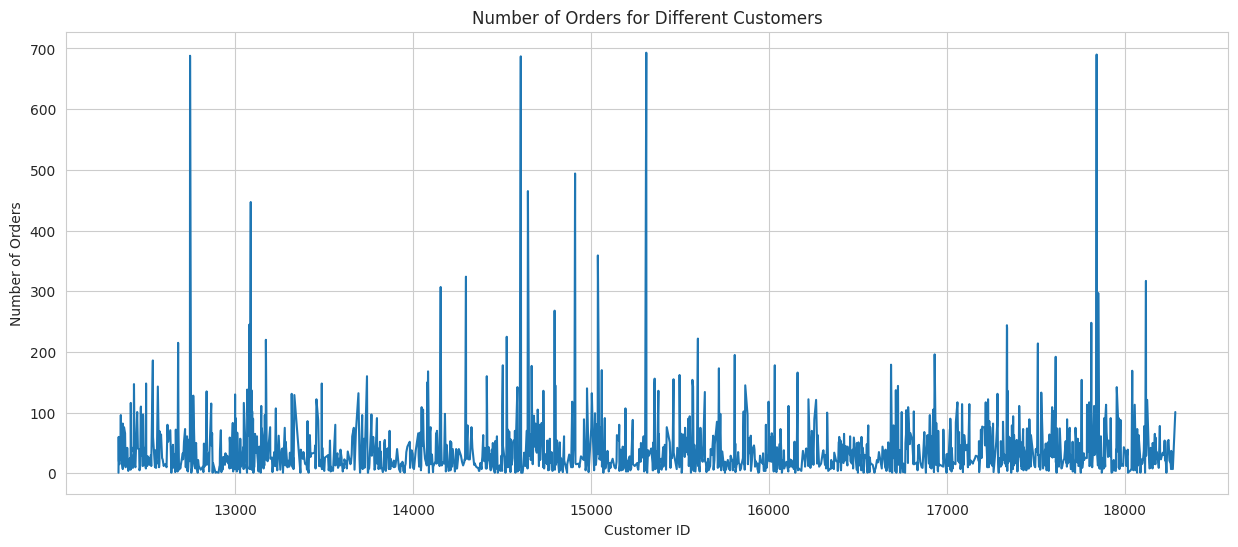

In [56]:
plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id, orders.invoice_num)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

### The TOP 5 most number of orders is:

In [57]:
orders.sort_values(by='invoice_num', ascending=False).head()

customer_id         country  invoice_num
807         15311  United Kingdom          693
1475        17841  United Kingdom          690
130         12748  United Kingdom          688
621         14606  United Kingdom          687
705         14911            EIRE          494

## How much money spent by the customers?

In [58]:
money_spent = df_new.groupby(by=['customer_id','country'], as_index=False)['amount_spent'].sum()
money_spent.head()

customer_id         country  amount_spent
0        12346  United Kingdom      77183.60
1        12347         Iceland       1187.18
2        12348         Finland        840.24
3        12350          Norway        294.40
4        12352          Norway        296.50

In [59]:
plt.subplots(figsize=(15,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### The TOP 5 most highest money spent

In [60]:
money_spent.sort_values(by='amount_spent', ascending=False).head()

customer_id         country  amount_spent
0           12346  United Kingdom      77183.60
632         14646     Netherlands      57701.02
1557        18102  United Kingdom      38370.09
491         14156            EIRE      25737.25
915         15749  United Kingdom      22998.40

# Discover Patterns

Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)

November looks like the month with most orders

## How many orders per day?

In [62]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

It looks like Thursday is the day with most orders

In [63]:
#ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
#ax.set_xlabel('Hour',fontsize=15)
#ax.set_ylabel('Number of Orders',fontsize=15)
#ax.set_title('Number of orders for different Hours',fontsize=15)
#ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
#plt.show()

# Discover Patterns for Unit Price

In [64]:
df_new.unit_price.describe()

count    62391.000000
mean         3.077419
std          4.932148
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max        295.000000
Name: unit_price, dtype: float64

There are orders with 0 unit price (free items)

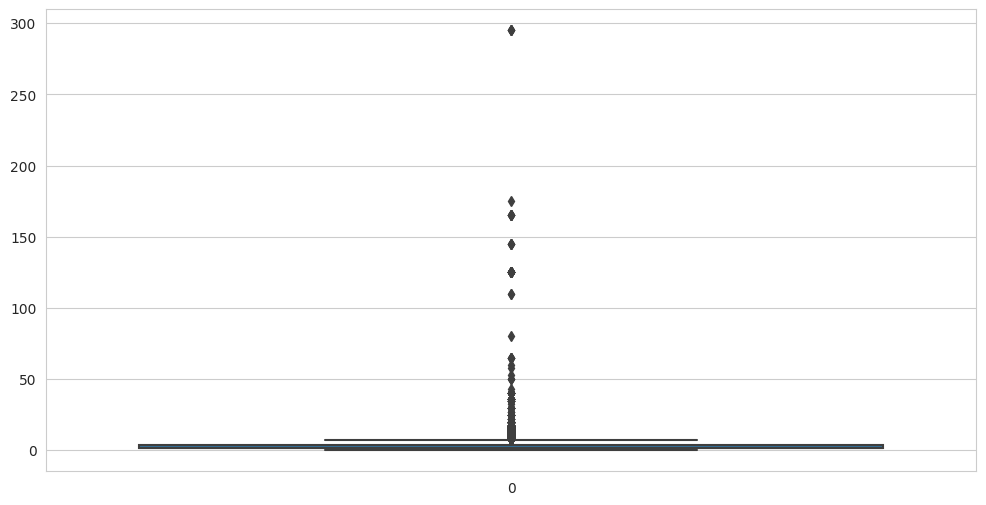

In [65]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

It looks like the majority of products have unit_price lower than 10. We will use 10 as a threshold value to deeper explore the unit_price.

In [66]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new[df_new['unit_price'] < 10].unit_price)
plt.show()

In [67]:
df_free=df_new[df_new['unit_price'] == 0]
df_free.head()

invoice_num        invoice_date  yearmonth  month  day  hour stock_code  \
86789      543599 2011-02-10 13:08:00     201102      2    4    13     84535B   
9302       537197 2010-12-05 14:02:00     201012     12    7    14      22841   
33576      539263 2010-12-16 14:36:00     201012     12    4    14      22580   
47070      540372 2011-01-06 16:41:00     201101      1    4    16      22553   
40089      539722 2010-12-21 13:45:00     201012     12    2    13      22423   

                        description  quantity  unit_price  amount_spent  \
86789  fairy cakes notebook a6 size        16         0.0           0.0   
9302   round cake tin vintage green         1         0.0           0.0   
33576  advent calendar gingham sack         4         0.0           0.0   
47070        plasters in tin skulls        24         0.0           0.0   
40089      regency cakestand 3 tier        10         0.0           0.0   

       customer_id         country  
86789        17560  United Kingdom  
9302         12647         Germany  
33576        16560  United Kingdom  
47070        13081  United Kingdom  
40089        14911            EIRE

### How many free items are sold on each month?

In [68]:
df_free.yearmonth.value_counts().sort_index()

201012    3
201101    3
201102    1
Name: yearmonth, dtype: int64

On average, we see that the companies give 2 items for free each month. No free items were given on June 2011 and Sept 2011

# Discover Patterns for each Country

How many orders for each country?

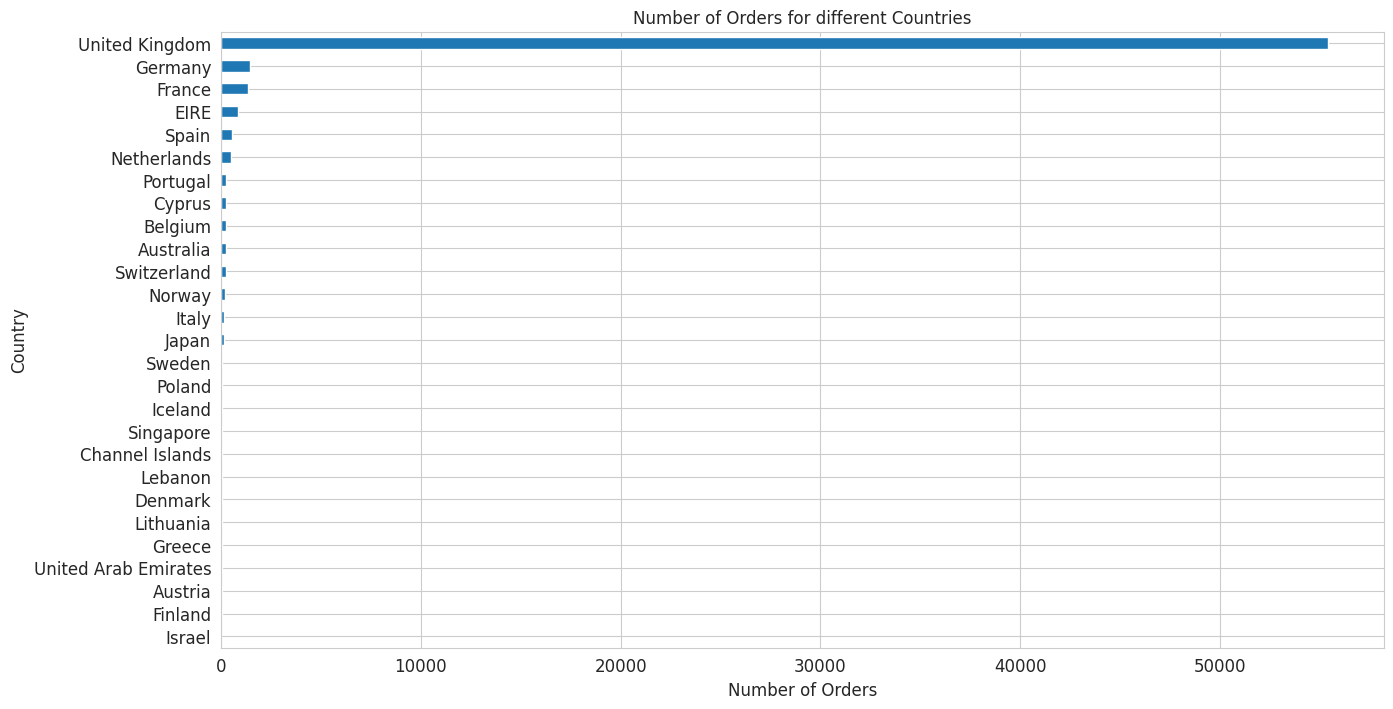

In [70]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

The company is based in UK, so it seems natural that the country with most sold items is UK.<br>
For further analysis, UK will be dropped

In [71]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Excluding the United Kingdom, Germany, France and EIRE are the two countries where customers spent the most money.

## How much money spent by each country?

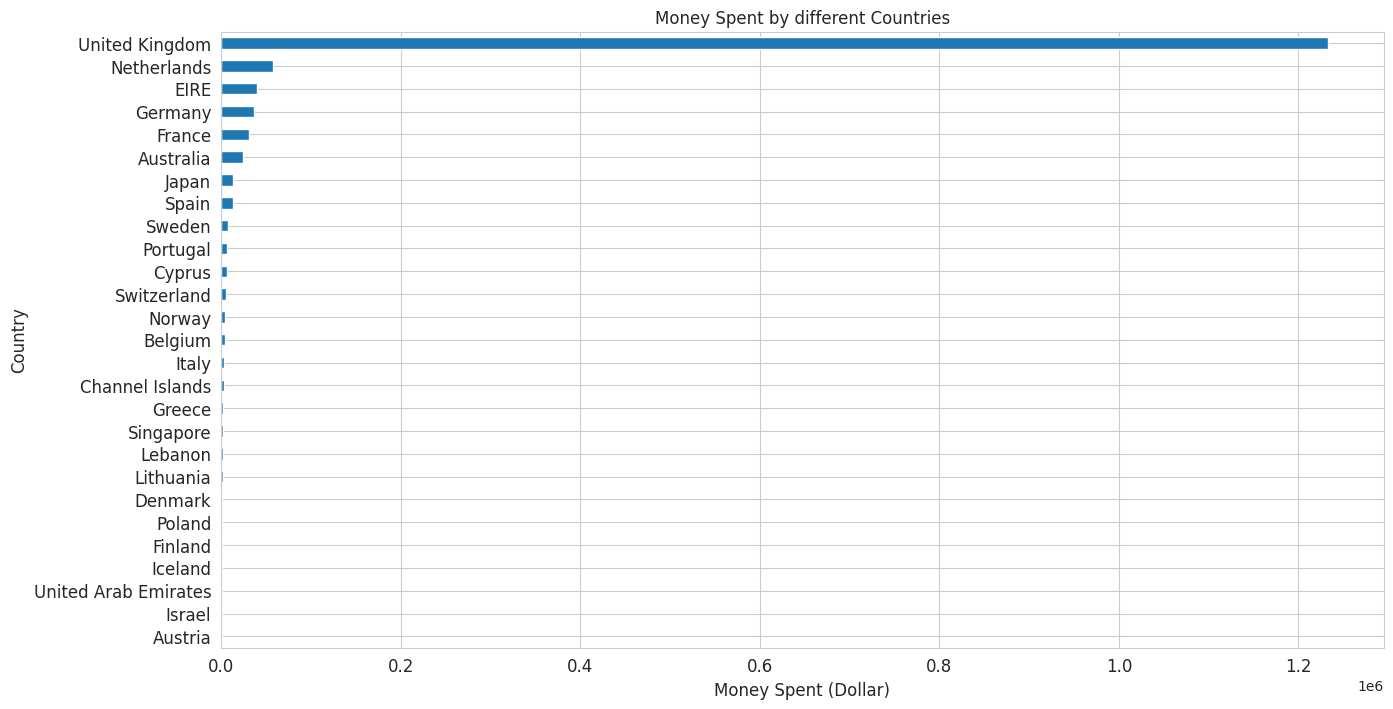

In [72]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

For similar reason as above, we will exclude UK for this analysis.

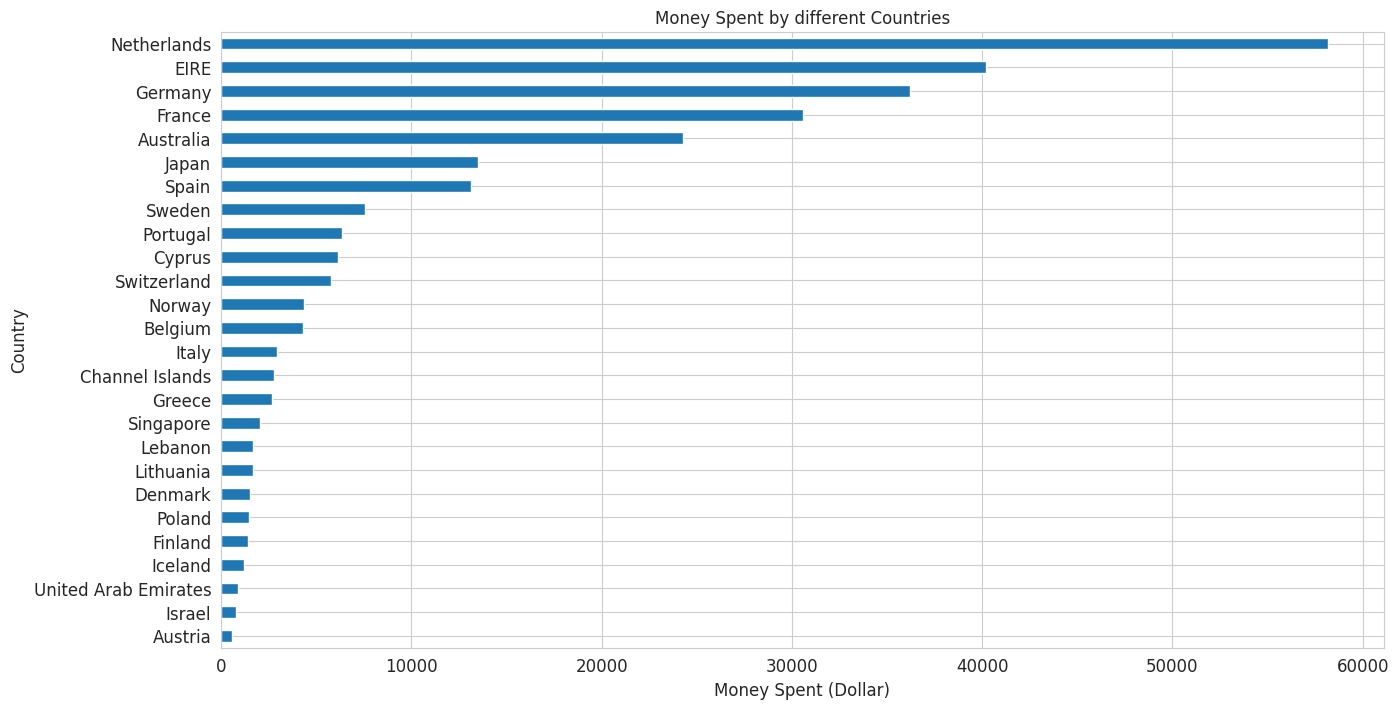

In [73]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']
# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Excluding the UK, customers from the Netherlands, EIRE, Germany, France and Australia spent the most money on the website.

# Sold product Analysis

In [74]:
df_new.head()

invoice_num        invoice_date  yearmonth  month  day  hour stock_code  \
2424       536591 2010-12-01 16:57:00     201012     12    3    16     90214V   
2425       536591 2010-12-01 16:57:00     201012     12    3    16     90214S   
17499      537765 2010-12-08 12:08:00     201012     12    3    12     90214S   
83087      543281 2011-02-06 15:34:00     201102      2    7    15     90214R   
64210      541595 2011-01-19 16:08:00     201101      1    3    16     90214R   

                     description  quantity  unit_price  amount_spent  \
2424   letter "v" bling key ring         1        1.25          1.25   
2425   letter "s" bling key ring         1        1.25          1.25   
17499  letter "s" bling key ring         2        1.25          2.50   
83087  letter "r" bling key ring         1        1.25          1.25   
64210  letter "r" bling key ring         1        1.25          1.25   

       customer_id         country  
2424         14606  United Kingdom  
2425         14606  United Kingdom  
17499        14606  United Kingdom  
83087        14606  United Kingdom  
64210        14606  United Kingdom

In [75]:
df_new['stock_code'].nunique()

2743

There are 3659 different sold products in the dataset

## Which products are the most sold?

In [76]:
most_sold_products=df_new.groupby(by=['stock_code','description'])['quantity'].sum().sort_values(ascending=False).iloc[:50]
df_top_prod=most_sold_products.to_frame().reset_index()
df_top_prod.head()

stock_code                         description  quantity
0      23166      medium ceramic top storage jar     74215
1     85123A  white hanging heart t-light holder     10708
2      84077   world war 2 gliders asstd designs     10036
3      21212     pack of 72 retrospot cake cases      8465
4     85099B             jumbo bag red retrospot      7246

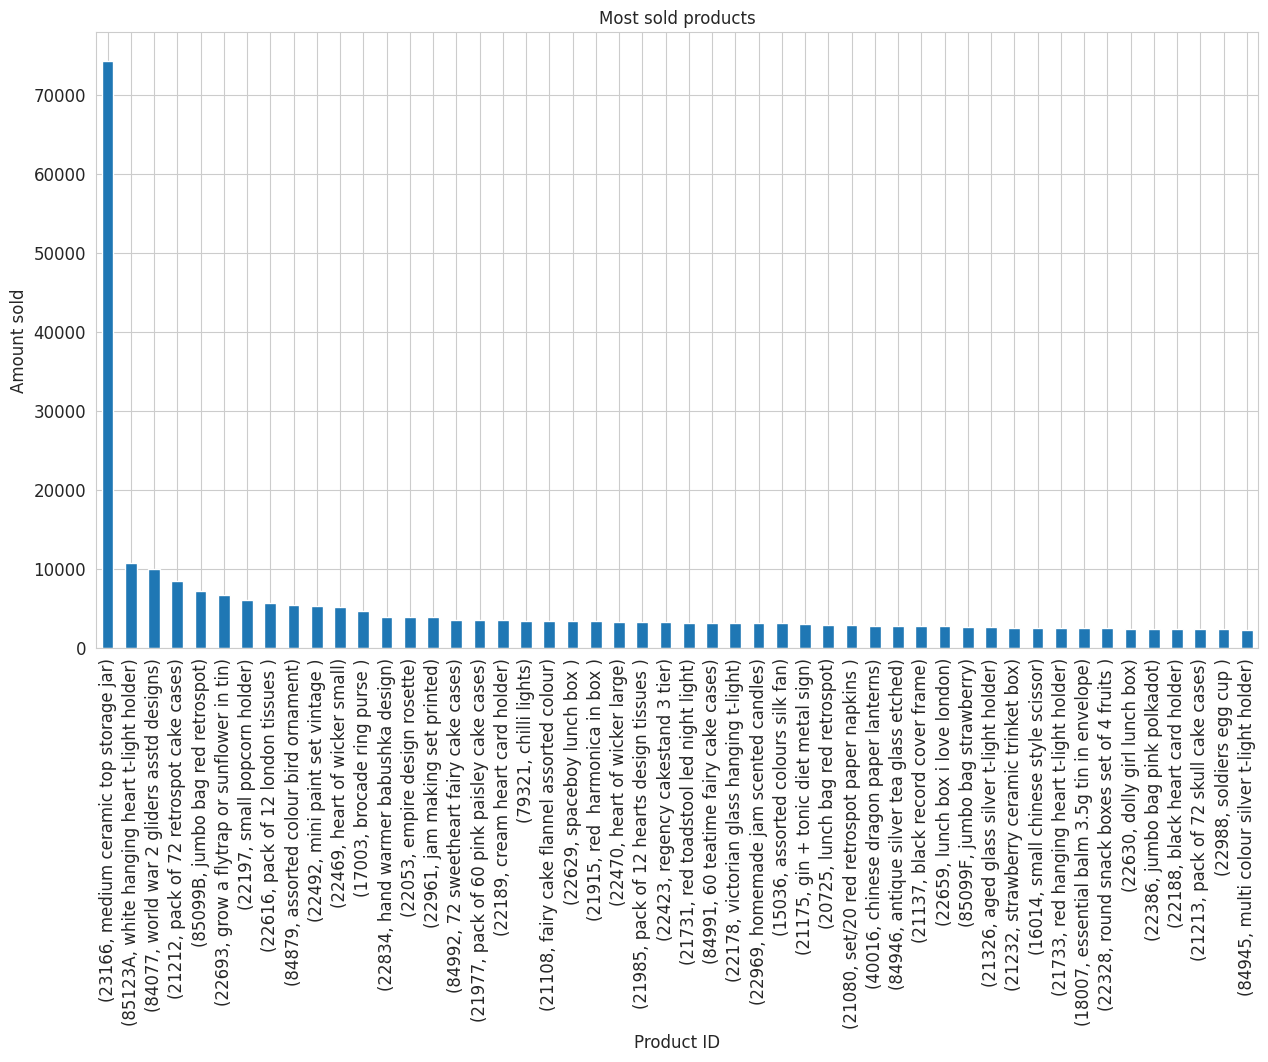

In [77]:
plt.subplots(figsize=(15,8))
most_sold_products.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Amount sold', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

# Most profitable products

### TOP 5 profitable products

In [78]:
most_profitable_product = df_new.groupby(by=['stock_code','description'])['amount_spent'].sum().sort_values(ascending=False).iloc[:50]
df_prof_prod = most_profitable_product.to_frame().reset_index().head()

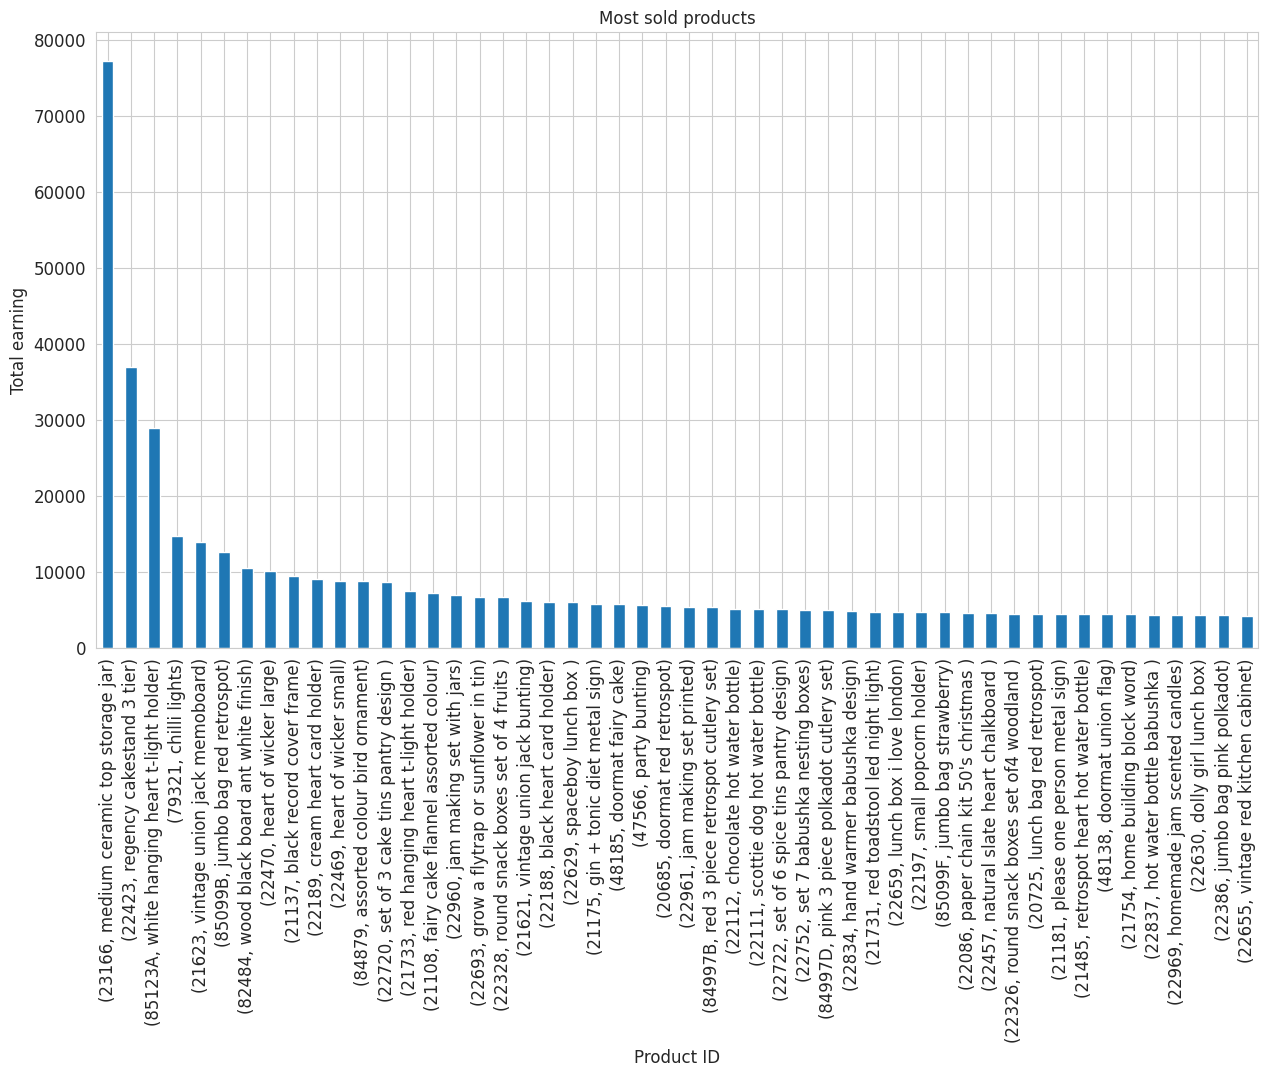

In [79]:
plt.subplots(figsize=(15,8))
most_profitable_product.plot(kind='bar', fontsize=12, color=color[0])
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total earning', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

## How much does the price per unit relate to quantity?

In [80]:
df_new.reset_index().head()

index invoice_num        invoice_date  yearmonth  month  day  hour  \
0   2424      536591 2010-12-01 16:57:00     201012     12    3    16   
1   2425      536591 2010-12-01 16:57:00     201012     12    3    16   
2  17499      537765 2010-12-08 12:08:00     201012     12    3    12   
3  83087      543281 2011-02-06 15:34:00     201102      2    7    15   
4  64210      541595 2011-01-19 16:08:00     201101      1    3    16   

  stock_code                description  quantity  unit_price  amount_spent  \
0     90214V  letter "v" bling key ring         1        1.25          1.25   
1     90214S  letter "s" bling key ring         1        1.25          1.25   
2     90214S  letter "s" bling key ring         2        1.25          2.50   
3     90214R  letter "r" bling key ring         1        1.25          1.25   
4     90214R  letter "r" bling key ring         1        1.25          1.25   

   customer_id         country  
0        14606  United Kingdom  
1        14606  United Kingdom  
2        14606  United Kingdom  
3        14606  United Kingdom  
4        14606  United Kingdom

In [81]:
df_3=df_new.drop_duplicates(subset=['stock_code','unit_price','description'])

In [82]:
df_3.sort_values(by=['stock_code','quantity'], inplace=True, ascending=False)
df_3.head()

invoice_num        invoice_date  yearmonth  month  day  hour stock_code  \
2424       536591 2010-12-01 16:57:00     201012     12    3    16     90214V   
2425       536591 2010-12-01 16:57:00     201012     12    3    16     90214S   
83087      543281 2011-02-06 15:34:00     201102      2    7    15     90214R   
29973      538839 2010-12-14 13:10:00     201012     12    2    13     90214M   
39046      539610 2010-12-20 14:33:00     201012     12    1    14     90214K   

                     description  quantity  unit_price  amount_spent  \
2424   letter "v" bling key ring         1        1.25          1.25   
2425   letter "s" bling key ring         1        1.25          1.25   
83087  letter "r" bling key ring         1        1.25          1.25   
29973  letter "m" bling key ring         7        1.25          8.75   
39046  letter "k" bling key ring         1        1.25          1.25   

       customer_id         country  
2424         14606  United Kingdom  
2425         14606  United Kingdom  
83087        14606  United Kingdom  
29973        14606  United Kingdom  
39046        14606  United Kingdom

### I will create a dictionary of dictionaries to include the unit price and quantities for each item

In [83]:
import collections

items_dict = collections.defaultdict(dict)

for product in df_3.iterrows():
    items_dict[product[1][6]][product[1][8]]=[product[1][9]][0]

In [84]:
df_4=pd.DataFrame(list(items_dict.items()),columns = ['stock_code','quantity_price'])
df_4.head()

stock_code quantity_price
0     90214V      {1: 1.25}
1     90214S      {1: 1.25}
2     90214R      {1: 1.25}
3     90214M      {7: 1.25}
4     90214K      {1: 1.25}

### Check the items with mutiple price per unit

In [85]:
df_5=df_4[df_4.quantity_price.apply(lambda x: len(x.keys())>1)]
df_5.head()

stock_code       quantity_price
15     90210C  {12: 1.25, 2: 2.95}
16     90210B  {12: 1.25, 1: 2.95}
17     90210A  {12: 1.25, 2: 2.95}
18     90209C   {36: 1.75, 6: 2.1}
98     90125D   {12: 0.85, 1: 2.1}

In [86]:
price_list=[]
for el in df_5.quantity_price:
    price_list.append(len(el.keys()))
df_5['counts']=price_list    
df_5=df_5.sort_values(by='counts', ascending=False)

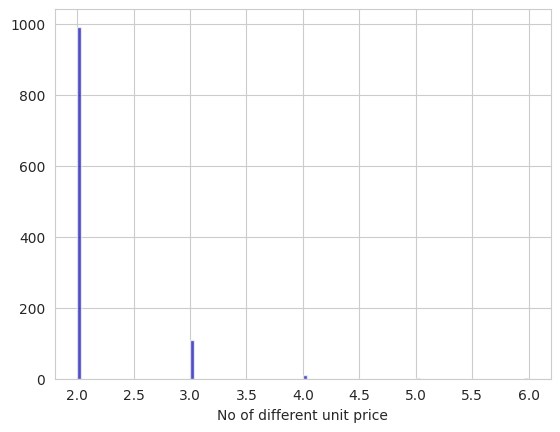

In [87]:
plt.hist(df_5['counts'], bins=100,color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('No of different unit price')
plt.show()

In [88]:
df_5['counts'].value_counts()

2    992
3    108
4     10
5      2
6      1
Name: counts, dtype: int64

Excuding prodicts with just one unit_price, most of the products has 2 or 3 unit prices.

## How does the price change in relation to the purchased quantity?

Number:  1


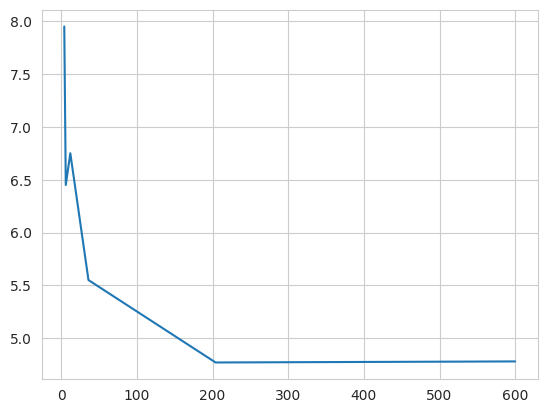

Number:  2


Number:  3


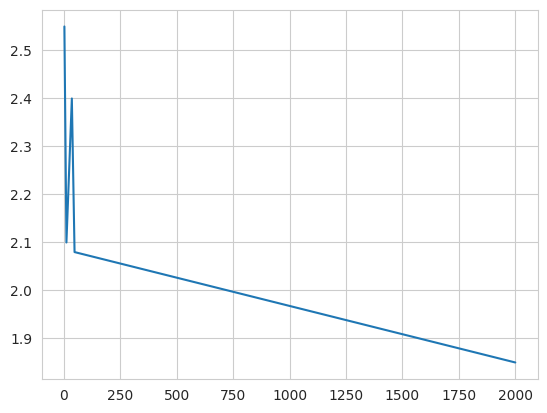

Number:  4


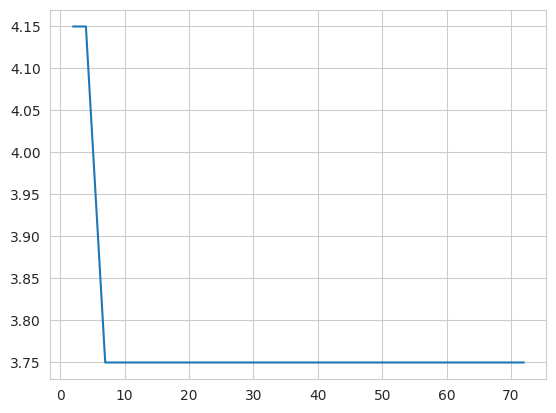

Number:  5


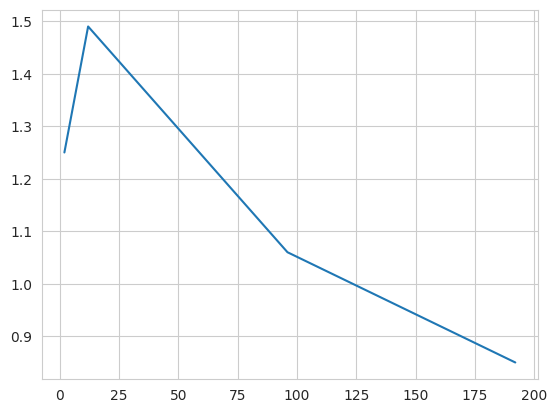

Number:  6


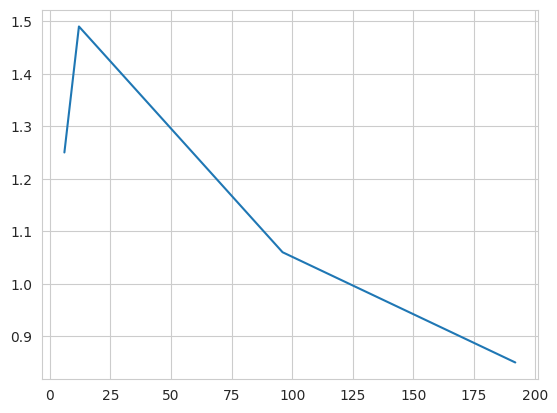

Number:  7


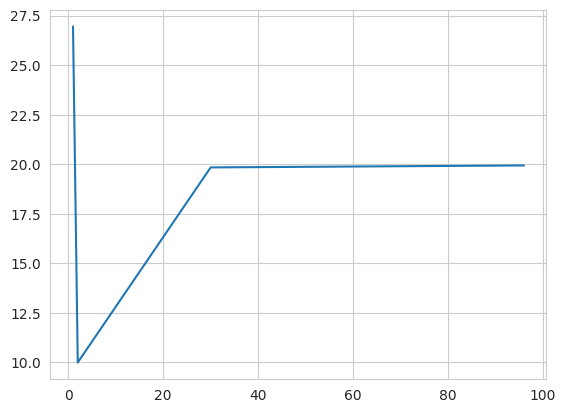

Number:  8


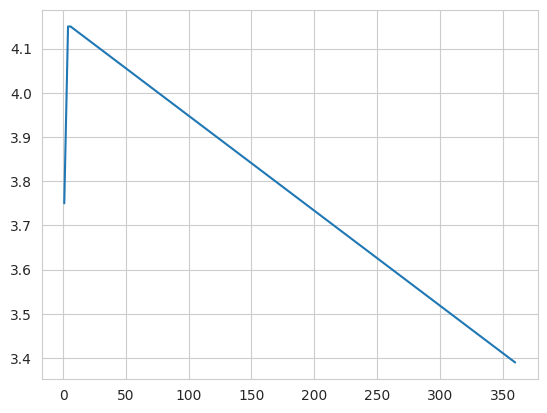

Number:  9


In [89]:
for i in range(1,10): #check first 10 products ordered by the quantity of different unit prices
    print('Number: ', i)
    keys=list(df_5.iloc[i-1:i].quantity_price.values[0].keys())
    values=list(df_5.iloc[i-1:i].quantity_price.values[0].values())
    plt.plot(keys, values)
    plt.show()

These plots shows that generally the unit price decresases with increasing quantity with some exceptions.

# Time series analysis for top sold products

In [90]:
#most sold products dataframe
df_top_prod.head()

stock_code                         description  quantity
0      23166      medium ceramic top storage jar     74215
1     85123A  white hanging heart t-light holder     10708
2      84077   world war 2 gliders asstd designs     10036
3      21212     pack of 72 retrospot cake cases      8465
4     85099B             jumbo bag red retrospot      7246

In this dataframe the quantity is the sum of all the sold quantites for each products. We need all tha single transactions related to these top psold products.

In [91]:
#check the number of transactions related to these top sold products
df_top_50 = df_new[df_new['description'].isin(df_top_prod['description'])]
df_top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6130 entries, 14087 to 82205
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_num   6130 non-null   object        
 1   invoice_date  6130 non-null   datetime64[ns]
 2   yearmonth     6130 non-null   int64         
 3   month         6130 non-null   int64         
 4   day           6130 non-null   int64         
 5   hour          6130 non-null   int64         
 6   stock_code    6130 non-null   object        
 7   description   6130 non-null   object        
 8   quantity      6130 non-null   int64         
 9   unit_price    6130 non-null   float64       
 10  amount_spent  6130 non-null   float64       
 11  customer_id   6130 non-null   int64         
 12  country       6130 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 670.5+ KB


In [92]:
print('The top 50 most old products account for the {} % of the total transactions'.format(np.round(len(df_top_50)/len(df_new),2)))

The top 50 most old products account for the 0.1 % of the total transactions


In [93]:
df_top_50.stock_code.value_counts()

85123A    466
22423     340
22469     293
22470     253
22961     243
85099B    233
84879     222
21733     206
21212     194
20725     181
22834     169
22197     157
21080     155
22969     145
79321     143
84992     140
22629     136
21232     128
22659     127
22988     127
84991     125
22178     124
21175     124
22386     119
22630     114
84946     112
21985     110
21977     106
85099F     99
21731      98
21915      95
22189      90
21213      83
22328      80
22616      79
21326      70
84077      60
22492      60
84945      53
21137      50
22188      48
15036      37
22693      32
17003      29
21108      26
40016      25
18007       9
16014       9
22053       5
23166       1
Name: stock_code, dtype: int64

### There are indeed lots of transactions related to these top sold products

It could be interesting to see how the product with stock code '23843' is in the top 50 with just 1 transaction

In [94]:
df_new[df_new['stock_code'] == '23843']

Empty DataFrame
Columns: [invoice_num, invoice_date, yearmonth, month, day, hour, stock_code, description, quantity, unit_price, amount_spent, customer_id, country]
Index: []

This transaction is related to the most sold product.

In [95]:
#most profitable products
df_prof_prod.head()

stock_code                         description  amount_spent
0      23166      medium ceramic top storage jar      77183.60
1      22423            regency cakestand 3 tier      36957.00
2     85123A  white hanging heart t-light holder      28944.30
3      79321                       chilli lights      14693.91
4      21623        vintage union jack memoboard      13949.13

In [96]:
df_top_50[df_top_50['stock_code'].isin(df_prof_prod.stock_code)].stock_code.value_counts()

85123A    466
22423     340
79321     143
23166       1
Name: stock_code, dtype: int64

The top 5 most profitable products with a number of transaction higher than 1000, have the 'stock code' : 85123A, 22423, 85099B

In [97]:
df_top1 = df_new[df_new['stock_code'] == '85123A']
df_top2 = df_new[df_new['stock_code'] == '22423']
df_top3 = df_new[df_new['stock_code'] == '85099B']

In [98]:
# creating a purchase day feature
df_top1['order_purchase_date'] = df_top1.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top1.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Most sold product')

Text(0.5, 1.0, 'Sales per day for the Most sold product')

There are indeed some peaks in quantity sold for these product.

Text(0.5, 1.0, 'Sales per day for the Second most sold product')

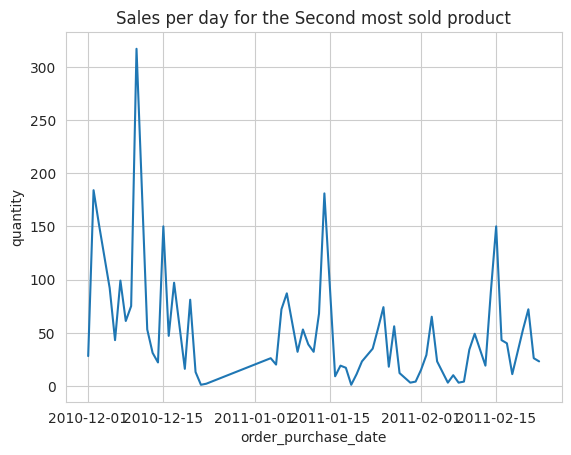

In [99]:
# creating a purchase day feature
df_top2['order_purchase_date'] = df_top2.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top2.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Second most sold product')

Text(0.5, 1.0, 'Sales per day for the Third most sold product')

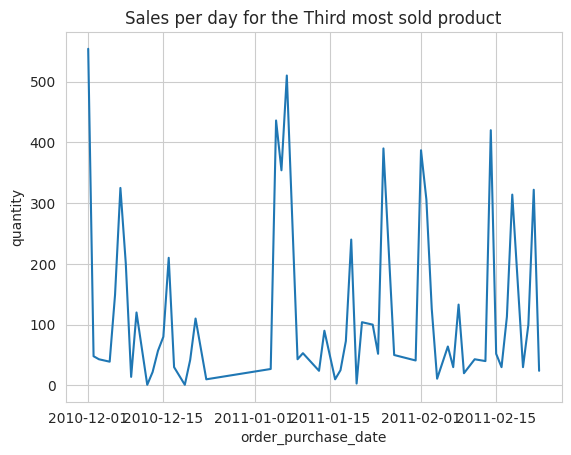

In [100]:
# creating a purchase day feature
df_top3['order_purchase_date'] = df_top3.invoice_date.dt.date

# creating an aggregation
sales_per_purch_date = df_top3.groupby('order_purchase_date', as_index=False).quantity.sum()
ax = sns.lineplot(x="order_purchase_date", y="quantity", data=sales_per_purch_date)
ax.set_title('Sales per day for the Third most sold product')

These plots do not show a clear pattern in the data. It could be interesting to try to predict the future sales.